In [41]:
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns
import warnings as wr
wr.filterwarnings("ignore")

In [42]:
df = pd.read_csv("Breast Cancer.csv")

In [43]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
df.info() #dataset details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [45]:
df1=df.drop(["id"],axis=1) # leave out "id" column

In [46]:
df1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder() #create LabelEncoder object

In [49]:
df1.diagnosis = le.fit_transform(df[['diagnosis']]) # encoding "diagnosis" column

In [50]:
df1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

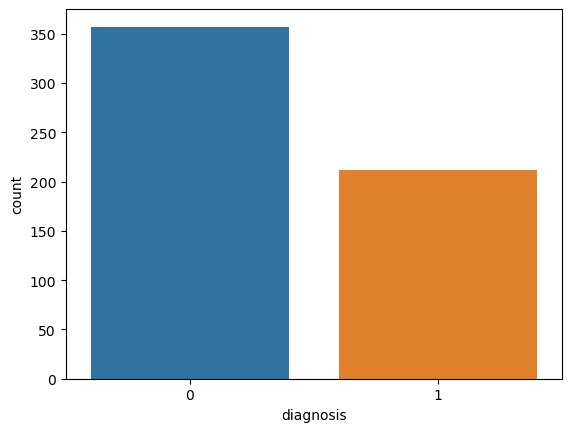

In [51]:
sns.countplot(x='diagnosis', data=df1) #shows count value of 0 and 1

In [52]:
df.diagnosis.value_counts() # amount of M & B
# M = 1
# B = 0

B    357
M    212
Name: diagnosis, dtype: int64

In [53]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:>

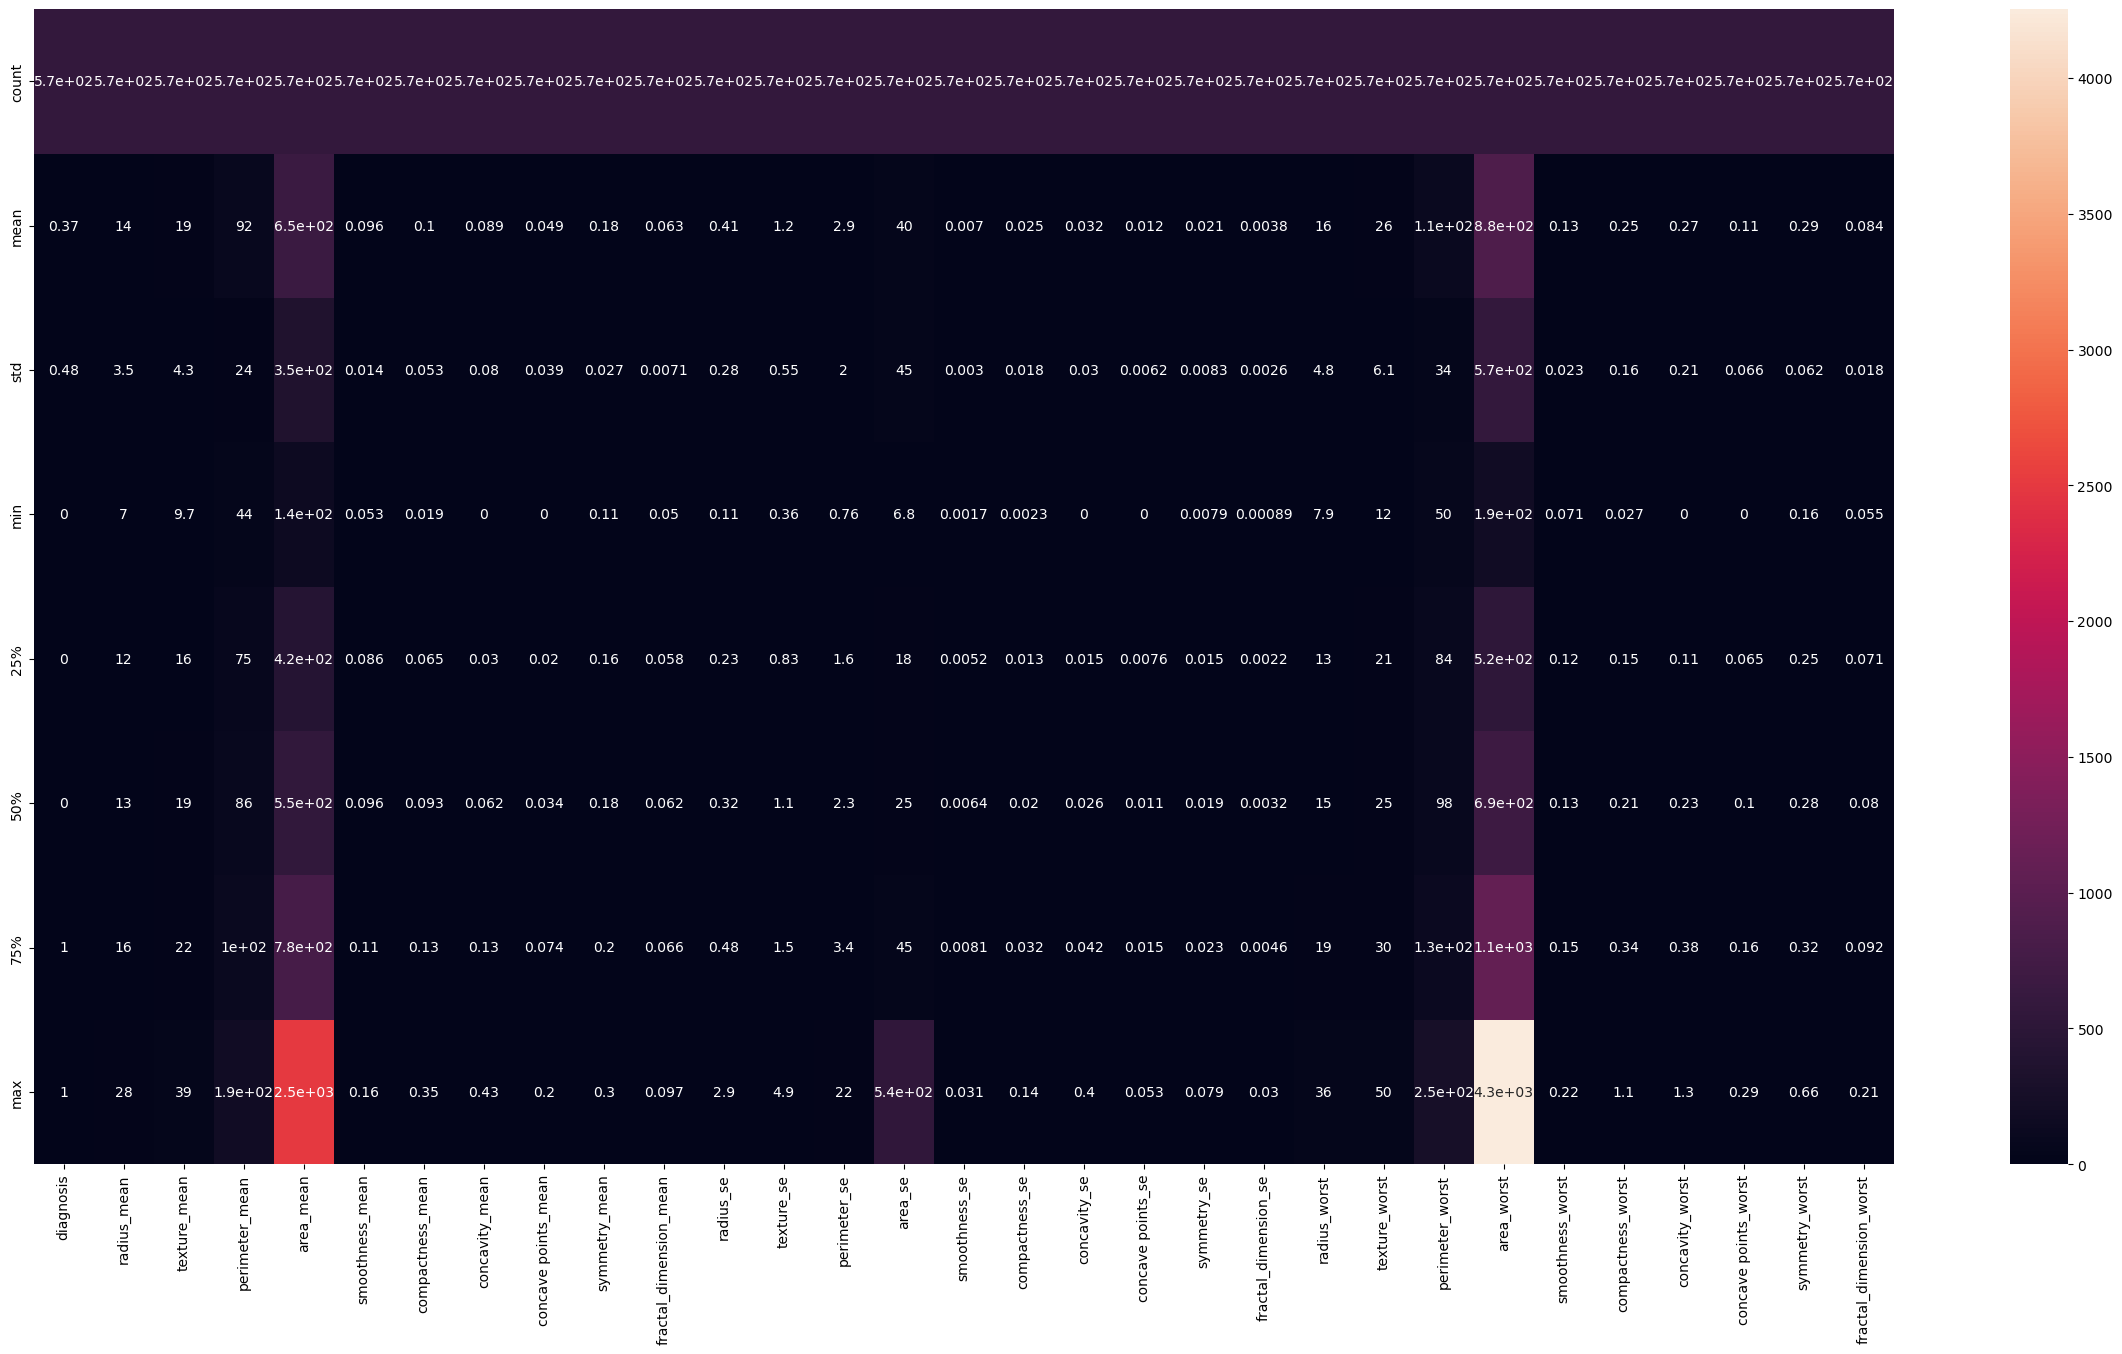

In [54]:
from matplotlib import pyplot as plt
plt.figure(figsize=(30,15))
sns.heatmap(df1.describe(), annot=True) #sns.heatmap() visualize the dataset in scientific way

<AxesSubplot:>

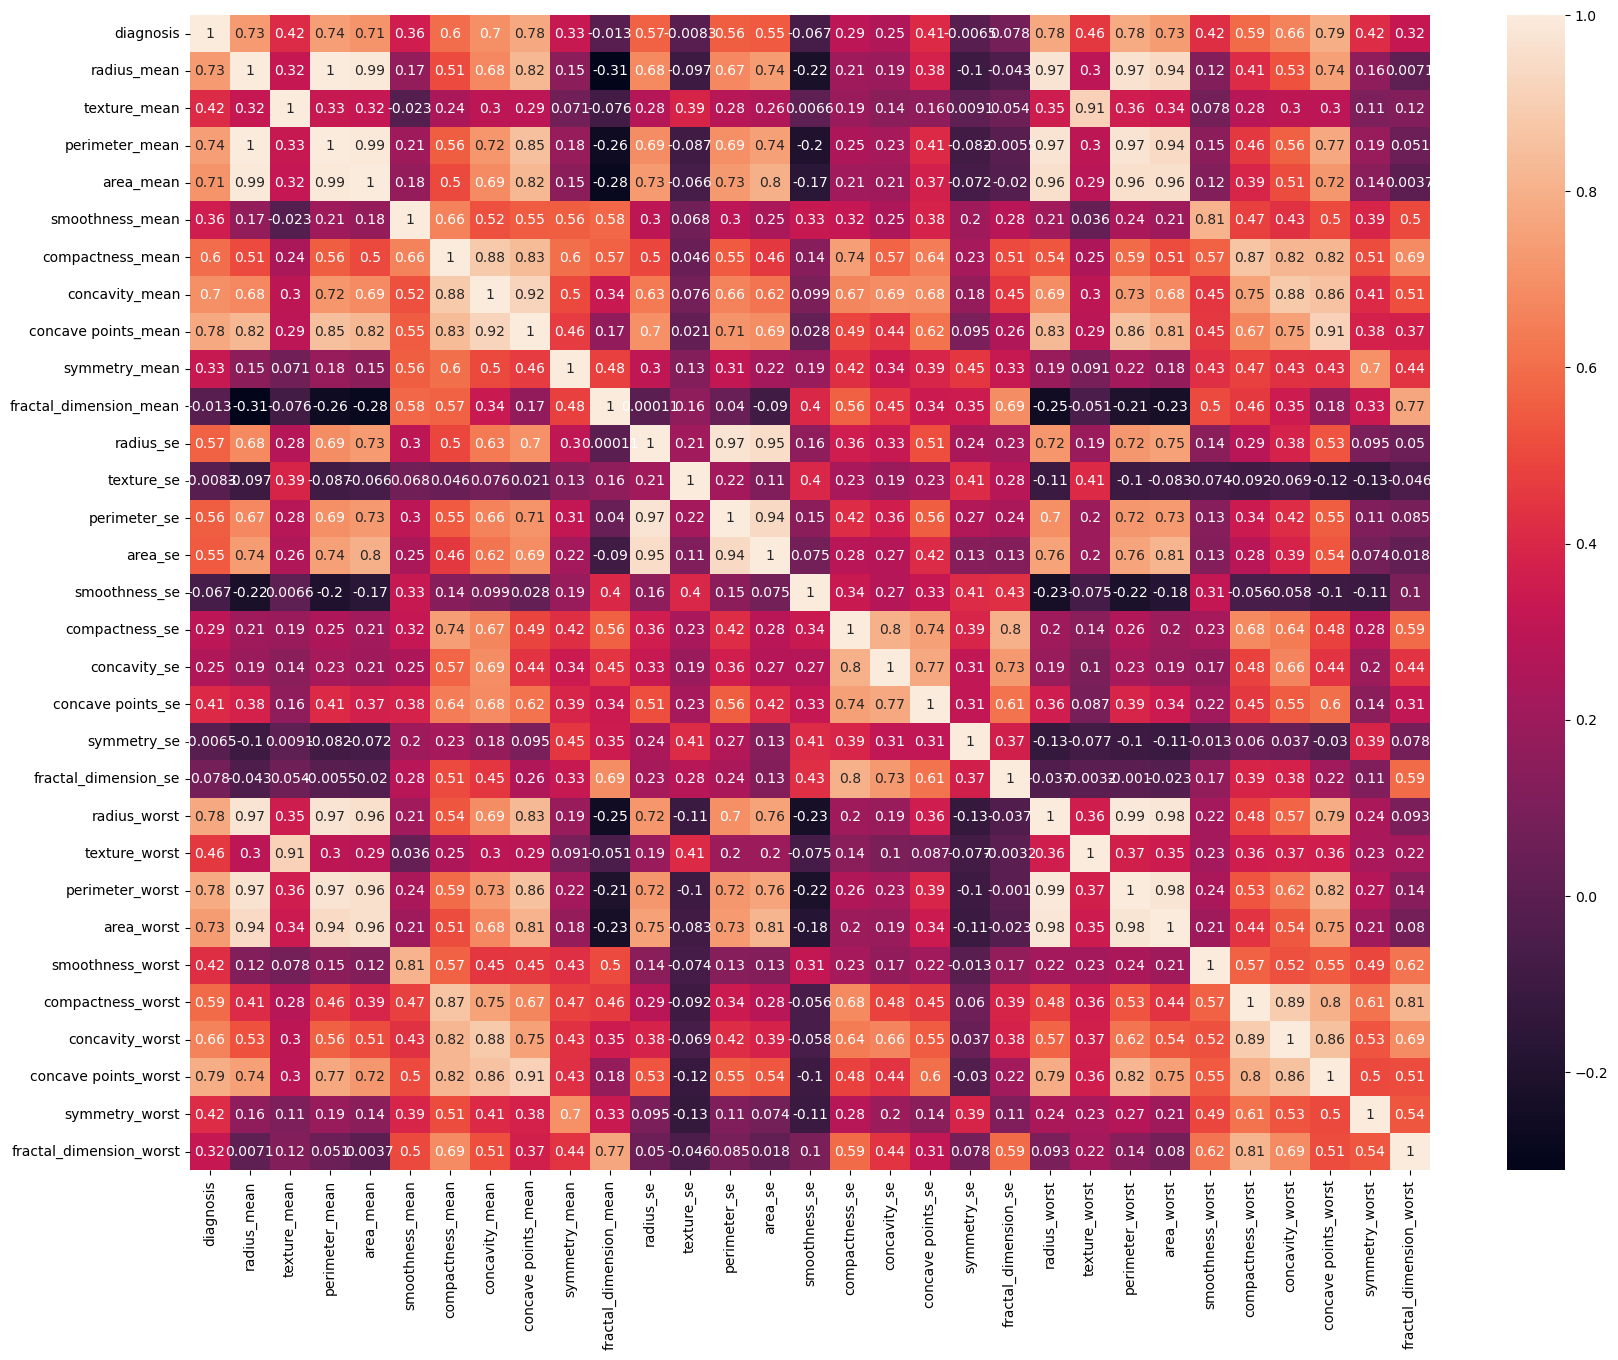

In [55]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), annot=True) # Co-relation between each feature plotting by sns.heatmap()

In [56]:
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:xlabel='radius_mean', ylabel='count'>

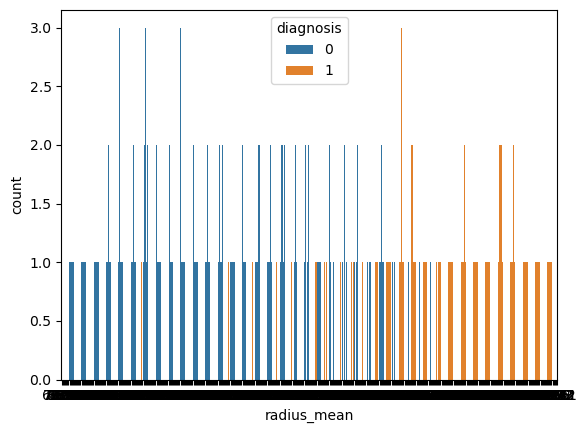

In [57]:
sns.countplot(x="radius_mean", hue = "diagnosis", data = df1)

In [58]:
df1.shape

(569, 31)

In [59]:
x = df1.drop('diagnosis', axis=1) # x- axis value without "diagnosis" column

In [60]:
#target feature
y = df1[["diagnosis"]] # y = "diagnosis" column

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70, random_state=50)
# train size = 70% and test size = 30%

In [63]:
xtrain.shape, ytrain.shape

((398, 30), (398, 1))

In [64]:
xtest.shape, ytest.shape

((171, 30), (171, 1))

In [65]:
df1.shape

(569, 31)

In [66]:
xtrain

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
517,19.89,20.26,130.50,1214.0,0.10370,0.13100,0.14110,0.09431,0.1802,0.06188,...,23.73,25.23,160.50,1646.0,0.1417,0.33090,0.41850,0.16130,0.2549,0.09136
293,11.85,17.46,75.54,432.7,0.08372,0.05642,0.02688,0.02280,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
272,21.75,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,0.1721,0.06194,...,28.19,28.18,195.90,2384.0,0.1272,0.47250,0.58070,0.18410,0.2833,0.08858
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.1402,0.14020,0.10550,0.06499,0.2894,0.07664
506,12.22,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.02166,0.2124,0.06894,...,13.16,24.17,85.13,515.3,0.1402,0.23150,0.35350,0.08088,0.2709,0.08839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.23360,0.26870,0.17890,0.2551,0.06589
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.1395,0.30550,0.29920,0.13120,0.3480,0.07619
289,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.02173,0.2013,0.05955,...,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994
109,11.34,21.26,72.48,396.5,0.08759,0.06575,0.05133,0.01899,0.1487,0.06529,...,13.01,29.15,83.99,518.1,0.1699,0.21960,0.31200,0.08278,0.2829,0.08832


In [67]:
xtest

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
356,13.05,18.59,85.09,512.0,0.10820,0.13040,0.096030,0.05603,0.2035,0.06501,...,14.19,24.85,94.22,591.2,0.13430,0.26580,0.25730,0.12580,0.3113,0.08317
556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,10.65,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
283,16.24,18.77,108.80,805.1,0.10660,0.18020,0.194800,0.09052,0.1876,0.06684,...,18.55,25.09,126.90,1031.0,0.13650,0.47060,0.50260,0.17320,0.2770,0.10630
495,14.87,20.21,96.12,680.9,0.09587,0.08345,0.068240,0.04951,0.1487,0.05748,...,16.01,28.48,103.90,783.6,0.12160,0.13880,0.17000,0.10170,0.2369,0.06599
364,13.40,16.95,85.48,552.4,0.07937,0.05696,0.021810,0.01473,0.1650,0.05701,...,14.73,21.70,93.76,663.5,0.12130,0.16760,0.13640,0.06987,0.2741,0.07582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,14.42,19.77,94.48,642.5,0.09752,0.11410,0.093880,0.05839,0.1879,0.06390,...,16.33,30.86,109.50,826.4,0.14310,0.30260,0.31940,0.15650,0.2718,0.09353
455,13.38,30.72,86.34,557.2,0.09245,0.07426,0.028190,0.03264,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675
378,13.66,15.15,88.27,580.6,0.08268,0.07548,0.042490,0.02471,0.1792,0.05897,...,14.54,19.64,97.96,657.0,0.12750,0.31040,0.25690,0.10540,0.3387,0.09638
493,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028


In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dtc = DecisionTreeClassifier() # create DecisionTreeClassifier object

In [70]:
dtc.fit(xtrain, ytrain) # training

DecisionTreeClassifier()

In [71]:
dtc.predict(xtest) # prediction by (xtest) dataset

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [72]:
pred = dtc.predict(xtest) # create variable

In [73]:
xtest['predict_y'] = pred # create a new column "predict_y"
xtest

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,predict_y
356,13.05,18.59,85.09,512.0,0.10820,0.13040,0.096030,0.05603,0.2035,0.06501,...,24.85,94.22,591.2,0.13430,0.26580,0.25730,0.12580,0.3113,0.08317,1
556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,0
283,16.24,18.77,108.80,805.1,0.10660,0.18020,0.194800,0.09052,0.1876,0.06684,...,25.09,126.90,1031.0,0.13650,0.47060,0.50260,0.17320,0.2770,0.10630,1
495,14.87,20.21,96.12,680.9,0.09587,0.08345,0.068240,0.04951,0.1487,0.05748,...,28.48,103.90,783.6,0.12160,0.13880,0.17000,0.10170,0.2369,0.06599,0
364,13.40,16.95,85.48,552.4,0.07937,0.05696,0.021810,0.01473,0.1650,0.05701,...,21.70,93.76,663.5,0.12130,0.16760,0.13640,0.06987,0.2741,0.07582,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,14.42,19.77,94.48,642.5,0.09752,0.11410,0.093880,0.05839,0.1879,0.06390,...,30.86,109.50,826.4,0.14310,0.30260,0.31940,0.15650,0.2718,0.09353,1
455,13.38,30.72,86.34,557.2,0.09245,0.07426,0.028190,0.03264,0.1375,0.06016,...,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675,1
378,13.66,15.15,88.27,580.6,0.08268,0.07548,0.042490,0.02471,0.1792,0.05897,...,19.64,97.96,657.0,0.12750,0.31040,0.25690,0.10540,0.3387,0.09638,0
493,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028,0


In [75]:
xtest['actual_y'] = ytest # create a new column "actual_y"
xtest

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,predict_y,actual_y
356,13.05,18.59,85.09,512.0,0.10820,0.13040,0.096030,0.05603,0.2035,0.06501,...,94.22,591.2,0.13430,0.26580,0.25730,0.12580,0.3113,0.08317,1,0
556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,0,0
283,16.24,18.77,108.80,805.1,0.10660,0.18020,0.194800,0.09052,0.1876,0.06684,...,126.90,1031.0,0.13650,0.47060,0.50260,0.17320,0.2770,0.10630,1,1
495,14.87,20.21,96.12,680.9,0.09587,0.08345,0.068240,0.04951,0.1487,0.05748,...,103.90,783.6,0.12160,0.13880,0.17000,0.10170,0.2369,0.06599,0,0
364,13.40,16.95,85.48,552.4,0.07937,0.05696,0.021810,0.01473,0.1650,0.05701,...,93.76,663.5,0.12130,0.16760,0.13640,0.06987,0.2741,0.07582,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,14.42,19.77,94.48,642.5,0.09752,0.11410,0.093880,0.05839,0.1879,0.06390,...,109.50,826.4,0.14310,0.30260,0.31940,0.15650,0.2718,0.09353,1,1
455,13.38,30.72,86.34,557.2,0.09245,0.07426,0.028190,0.03264,0.1375,0.06016,...,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675,1,0
378,13.66,15.15,88.27,580.6,0.08268,0.07548,0.042490,0.02471,0.1792,0.05897,...,97.96,657.0,0.12750,0.31040,0.25690,0.10540,0.3387,0.09638,0,0
493,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028,0,0


In [76]:
xtest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,predict_y,actual_y
356,13.05,18.59,85.09,512.0,0.10820,0.13040,0.096030,0.05603,0.2035,0.06501,...,94.22,591.2,0.1343,0.2658,0.25730,0.12580,0.3113,0.08317,1,0
556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742,0,0
283,16.24,18.77,108.80,805.1,0.10660,0.18020,0.194800,0.09052,0.1876,0.06684,...,126.90,1031.0,0.1365,0.4706,0.50260,0.17320,0.2770,0.10630,1,1
495,14.87,20.21,96.12,680.9,0.09587,0.08345,0.068240,0.04951,0.1487,0.05748,...,103.90,783.6,0.1216,0.1388,0.17000,0.10170,0.2369,0.06599,0,0
364,13.40,16.95,85.48,552.4,0.07937,0.05696,0.021810,0.01473,0.1650,0.05701,...,93.76,663.5,0.1213,0.1676,0.13640,0.06987,0.2741,0.07582,0,0


In [78]:
xtest = xtest.drop(['predict_y', 'actual_y'], axis=1) # leave out two new column 

In [79]:
dtc.predict(xtest)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

# Confusion Matrix

In [80]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [81]:
classification_report(ytest, dtc.predict(xtest)) 
# complete report of the Decision Matrix model including acuracy, precision, recall, f-measure etc

'              precision    recall  f1-score   support\n\n           0       0.95      0.91      0.93       112\n           1       0.84      0.92      0.88        59\n\n    accuracy                           0.91       171\n   macro avg       0.90      0.91      0.90       171\nweighted avg       0.92      0.91      0.91       171\n'

In [82]:
confusion_matrix(ytest, dtc.predict(xtest))
# keep watching Confusion Matrix

array([[102,  10],
       [  5,  54]], dtype=int64)

In [83]:
tp, fn, fp, tn = confusion_matrix(ytest, dtc.predict(xtest)).reshape(-1)
"""create variable for
tp = True Positive
fn = False Negative
fp = False Positive
tn = True Negative""" 

In [84]:
tp

102

In [85]:
fn

10

In [86]:
fp

5

In [87]:
tn

54

### Accuracy

In [88]:
acc = (tp+tn)/(tp+fp+tn+fn) 
acc

0.9122807017543859

### Precision or Positive Predict Value

In [89]:
ppv = tp/(tp+fp)
ppv

0.9532710280373832

### Sensitivity , Recall, Hit Rate or True Positive Rate 

In [90]:
tpr = tp/(tp+fn) 
tpr

0.9107142857142857

### False Positive Rate or 1-Specifity

In [91]:
fpr = fp/(fp+tn)
fpr

0.0847457627118644

### F1 Measure

In [92]:
F1_Measure = (ppv + tpr)/2
F1_Measure

0.9319926568758344

###  Harmoic Mean, F1 Score

In [93]:
f1 = (2*ppv*tpr)/(ppv+tpr)
f1

0.9315068493150684

### Specifity, Selectivity or True Negative Rate 

In [94]:
tnr = tn/(tn+fp)
tnr

0.9152542372881356

### False Discovery Rate 

In [95]:
fdr = fp/(tp+fp)
fdr

0.04672897196261682

### AUC and ROC curve 

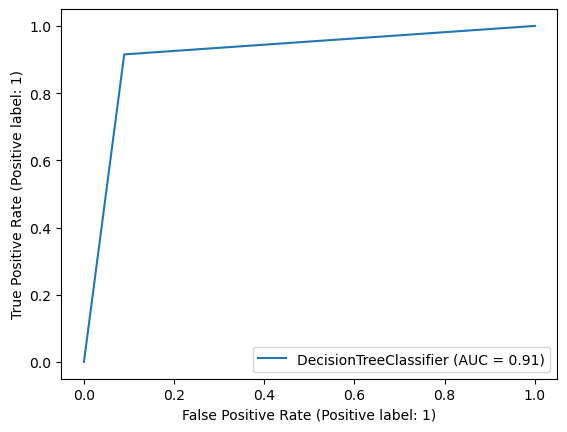

In [96]:
"""AUC - ROC curve is a performance measurement for the classification problems at various threshold settings.
ROC is a probability curve and AUC represents the degree or measure of separability."""
plot_roc_curve(dtc,xtest,ytest)

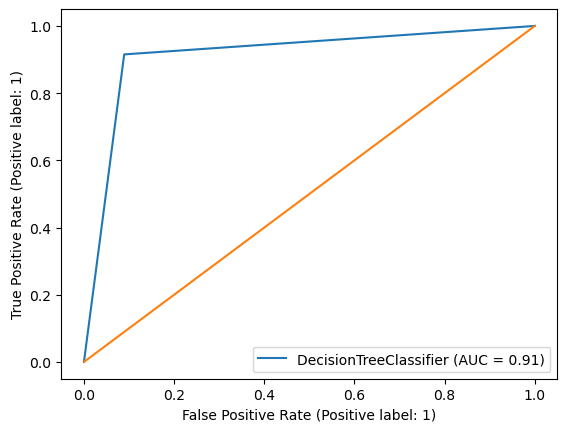

In [97]:
plot_roc_curve(dtc, xtest, ytest)
plt.plot([0,1],[0,1])